In [1]:
import pandas as pd
import numpy as np

In [2]:
# Load datasets
df = pd.read_csv('2020_10K_item1_full.csv')
public_firm = pd.read_csv('public_firms.csv')
df_mg = pd.read_csv('major_groups.csv')

In [3]:
df

,cik,year,name,item_1_text,gvkey
0,1041588,2020,ACCESS-POWER INC,fixed expenses are previosuly documented in an...,66119
1,315374,2020,HURCO COMPANIES INC,"General Hurco Companies, Inc. is an internatio...",5788
2,1622996,2020,"ACRO BIOMEDICAL CO., LTD.",We have been engaged in the business of develo...,27584
3,1191334,2020,Chun Can Capital Group,CORPORATE HISTORY Chun Can Capital Group (form...,153614
4,1191334,2020,Chun Can Capital Group,CORPORATE HISTORY Chun Can Capital Group (form...,153614
...,...,...,...,...,...
5476,740664,2020,R F INDUSTRIES LTD,"General RF Industries, Ltd. (together with sub...",2829
5477,1074828,2020,"KNOW LABS, INC.","BACKGROUND AND CAPITAL STRUCTURE Know Labs, In...",166430
5478,40570,2020,GEE Group Inc.,"General GEE Group Inc. (the Company , us , ...",5050
5479,1341726,2020,"GULFSLOPE ENERGY, INC.","General GulfSlope Energy, Inc. is an independe...",175595


In [4]:
public_firm

,gvkey,fyear,location,conm,ipodate,sic,prcc_c,ch,ni,asset,sale,roa
0,1004,1994,USA,AAR CORP,1988/01/01,5080,13.375,22.487,10.463,425.814,451.395,0.024572
1,1004,1995,USA,AAR CORP,1988/01/01,5080,22.000,33.606,16.012,437.846,504.990,0.036570
2,1004,1996,USA,AAR CORP,1988/01/01,5080,30.250,51.705,23.025,529.584,589.328,0.043478
3,1004,1997,USA,AAR CORP,1988/01/01,5080,38.750,17.222,35.657,670.559,782.123,0.053175
4,1004,1998,USA,AAR CORP,1988/01/01,5080,23.875,8.250,41.671,726.630,918.036,0.057348
...,...,...,...,...,...,...,...,...,...,...,...,...
209207,345980,2019,USA,CONTEXTLOGIC INC,2020/12/16,5961,NaN,744.000,-129.000,1366.000,1901.000,-0.094436
209208,345980,2020,USA,CONTEXTLOGIC INC,2020/12/16,5961,18.240,1965.000,-745.000,2397.000,2541.000,-0.310805
209209,347085,2018,SGP,KAROOOOO LTD,2021/04/01,7370,NaN,3.692,16.851,108.754,120.390,0.154946
209210,347085,2019,SGP,KAROOOOO LTD,2021/04/01,7370,NaN,9.339,18.467,117.551,123.708,0.157098


In [5]:
df_mg

,major_group,description
0,1,Agricultural Production Crops
1,2,Agriculture production livestock and animal sp...
2,7,Agricultural Services
3,8,Forestry
4,9,Fishing hunting and trapping
...,...,...
78,94,Administration Of Human Resource Programs
79,95,Administration Of Environmental Quality And Ho...
80,96,Administration Of Economic Programs
81,97,National Security And International Affairs


PART 1A


In [6]:
filter_df_mg = df_mg.where(df_mg['description'] == 'Transportation By Air').dropna()
mg_number_float = filter_df_mg['major_group'].max()
mg_number = int(mg_number_float)
mg_number

45

In [7]:
# mg is a 2-digit int, e.g., 42
mask = (public_firm['sic'] // 100) == mg_number
df_pf_filtered = public_firm.loc[mask, :]          # all rows and columnsC

In [8]:
df_pf_filtered

,gvkey,fyear,location,conm,ipodate,sic,prcc_c,ch,ni,asset,sale,roa
118,1045,1995,USA,AMERICAN AIRLINES GROUP INC,NaN,4512,74.250,82.000,167.000,19556.000,16910.000,0.008540
119,1045,1996,USA,AMERICAN AIRLINES GROUP INC,NaN,4512,88.125,68.000,1016.000,20497.000,17753.000,0.049568
120,1045,1997,USA,AMERICAN AIRLINES GROUP INC,NaN,4512,128.500,64.000,985.000,20915.000,18570.000,0.047095
121,1045,1998,USA,AMERICAN AIRLINES GROUP INC,NaN,4512,59.375,95.000,1314.000,22303.000,19205.000,0.058916
122,1045,1999,USA,AMERICAN AIRLINES GROUP INC,NaN,4512,67.000,85.000,985.000,24374.000,17730.000,0.040412
...,...,...,...,...,...,...,...,...,...,...,...,...
208962,298636,2016,COL,AVIANCA HOLDINGS SA,NaN,4512,9.640,375.753,16.980,6351.335,4138.338,0.002673
208963,298636,2017,COL,AVIANCA HOLDINGS SA,NaN,4512,8.030,508.982,48.523,6861.396,4441.684,0.007072
208964,298636,2018,COL,AVIANCA HOLDINGS SA,NaN,4512,4.060,273.108,-24.803,7118.643,4890.830,-0.003484
208965,298636,2019,COL,AVIANCA HOLDINGS SA,NaN,4512,4.460,342.472,-913.712,7273.910,4614.975,-0.125615


In [9]:
unique_fyear = df_pf_filtered['fyear'].unique()
print(unique_fyear)
unique_fyear.size

[1995 1996 1997 1998 1999 2000 2001 2002 2003 2004 2005 2006 2007 2008
 2009 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020 1994]


27

In [10]:
unique_companies = df_pf_filtered['conm'].unique()
print(unique_companies)
unique_companies.size


['AMERICAN AIRLINES GROUP INC' 'AIR T INC' 'AIRBORNE INC'
 'ALASKA AIR GROUP INC' 'US AIRWAYS GROUP INC' 'AMERICAN AIRLINES INC'
 'ASA HOLDINGS INC' 'BIG SKY TRANSPORTATION' 'COMAIR HOLDINGS INC'
 'LYNTON GROUP INC' 'DELTA AIR LINES INC' 'FEDEX CORP'
 'FLIGHT INTERNATIONAL GROUP' 'HUDSON GENERAL CORP'
 'KLM-ROYAL DUTCH AIRLINES' 'MAIR HOLDINGS INC' 'METRO AIRLINES INC'
 'NORTHWEST AIRLINES CORP' 'BRISTOW GROUP INC' 'PHI INC'
 'SOUTHWEST AIRLINES' 'UNITED AIRLINES INC' 'TRANS WORLD AIRLINES'
 'UNITED AIRLINES HOLDINGS INC' 'US AIRWAYS GROUP INC-OLD' 'WORLDCORP INC'
 'SKYWEST INC' 'INTL CONSOL AIRLINES GROUP' 'MESA AIR GROUP INC'
 'AIR METHODS CORP' 'TAT TECHNOLOGIES LTD' 'U S AIR INC'
 'TROPIC AIR CARGO INC' 'UNITED AIRLINES INC -OLD' 'CCAIR INC' 'AZUL SA'
 'JAPAN AIRLINES CO LTD' 'CHC GROUP LTD' 'VIRGIN AMERICA INC'
 'E PRIME AEROSPACE CORP' 'AIR L A INC' 'RENO AIR INC'
 'GLOBAL AVIATION HOLDINGS INC' 'FLYI INC' 'ALASKA AIRLINES INC'
 'EVERGREEN INTL AVIATION INC' 'TOWER AIR INC' 'GREA

111

In [11]:
years = range(1994, 2021)  # 1994–2020 inclusive => 27 years
mask = df_pf_filtered['fyear'].between(1994, 2020)            # inclusive by default
g = df_pf_filtered.loc[mask].groupby('conm')['fyear'].nunique()

n_companies_all_years = int((g == len(years)).sum())          # the count requested
companies_all_years = g.index[g == len(years)].tolist()       # optional: the actual names
print(n_companies_all_years)

4


PART 1B

In [12]:
df_pf_2020 = df_pf_filtered.groupby('fyear').get_group(2020)
df_pf_2020

,gvkey,fyear,location,conm,ipodate,sic,prcc_c,ch,ni,asset,sale,roa
143,1045,2020,USA,AMERICAN AIRLINES GROUP INC,NaN,4512,15.7700,245.000,-8885.000,62008.000,17337.000,-0.143288
790,1210,2020,USA,AIR T INC,NaN,4513,24.9000,10.996,-7.277,140.750,175.121,-0.051702
900,1230,2020,USA,ALASKA AIR GROUP INC,NaN,4512,52.0000,1370.000,-1324.000,14046.000,3566.000,-0.094262
1442,1388,2020,USA,AMERICAN AIRLINES INC,NaN,4512,NaN,231.000,-8450.000,69215.000,17335.000,-0.122083
11302,3851,2020,USA,DELTA AIR LINES INC,NaN,4512,40.2100,8307.000,-12385.000,71996.000,17095.000,-0.172023
14369,4598,2020,USA,FEDEX CORP,NaN,4513,259.6200,7087.000,5231.000,82777.000,83959.000,0.063194
29144,8092,2020,USA,BRISTOW GROUP INC,NaN,4522,26.3200,228.010,-56.094,1992.270,1178.062,-0.028156
36248,9882,2020,USA,SOUTHWEST AIRLINES,NaN,4512,46.6100,11063.000,-3074.000,34588.000,9048.000,-0.088875
38525,10484,2020,USA,UNITED AIRLINES INC,NaN,4512,NaN,11269.000,-7067.000,59520.000,15355.000,-0.118733
39909,10795,2020,USA,UNITED AIRLINES HOLDINGS INC,NaN,4512,43.2500,11269.000,-7069.000,59548.000,15355.000,-0.118711


In [13]:
df_pf_stocks = df_pf_2020.sort_values(by='prcc_c',  ascending=False).head(10)
df_pf_stocks

,gvkey,fyear,location,conm,ipodate,sic,prcc_c,ch,ni,asset,sale,roa
14369,4598,2020,USA,FEDEX CORP,NaN,4513,259.62,7087.000,5231.000,82777.000,83959.000,0.063194
190505,175007,2020,USA,ALLEGIANT TRAVEL CO,2006/12/08,4512,189.24,152.764,-184.093,3258.925,990.073,-0.056489
169375,140045,2020,MEX,GRUPO AEROPORTUARIO SURESTE,2000/09/28,4581,164.93,258.997,98.375,3013.178,629.694,0.032648
188222,166385,2020,MEX,GRUPO AEROPORTUARIO DEL PACI,2006/02/24,4581,111.29,720.463,98.202,2561.782,591.868,0.038333
138511,64835,2020,IRL,RYANAIR HOLDINGS PLC,1997/05/29,4512,109.98,3111.190,-1191.447,14469.671,1919.978,-0.082341
187501,165678,2020,PAN,COPA HOLDINGS SA,2005/12/15,4512,77.23,119.065,-607.062,3853.384,813.344,-0.157540
119487,61155,2020,USA,ATLAS AIR WORLDWIDE HLDG INC,1995/08/10,4522,54.54,845.589,360.286,6029.188,3211.116,0.059757
900,1230,2020,USA,ALASKA AIR GROUP INC,NaN,4512,52.00,1370.000,-1324.000,14046.000,3566.000,-0.094262
191794,176152,2020,MEX,GRUPO AEROPORTUARIO DEL CENT,2006/11/29,4581,51.68,147.578,54.584,907.356,267.717,0.060157
36248,9882,2020,USA,SOUTHWEST AIRLINES,NaN,4512,46.61,11063.000,-3074.000,34588.000,9048.000,-0.088875


In [14]:
df_pf_sale = df_pf_filtered.sort_values(by='sale', ascending=False).head(10)
df_pf_sale

,gvkey,fyear,location,conm,ipodate,sic,prcc_c,ch,ni,asset,sale,roa
14369,4598,2020,USA,FEDEX CORP,NaN,4513,259.62,7087.0,5231.0,82777.0,83959.0,0.063194
14367,4598,2018,USA,FEDEX CORP,NaN,4513,161.33,2319.0,540.0,54403.0,69693.0,0.009926
14368,4598,2019,USA,FEDEX CORP,NaN,4513,151.21,4881.0,1286.0,73537.0,69217.0,0.017488
14366,4598,2017,USA,FEDEX CORP,NaN,4513,249.54,3265.0,4572.0,52330.0,65450.0,0.087369
14365,4598,2016,USA,FEDEX CORP,NaN,4513,186.20,3969.0,2997.0,48552.0,60319.0,0.061728
14364,4598,2015,USA,FEDEX CORP,NaN,4513,148.99,3534.0,1820.0,46064.0,50365.0,0.039510
14363,4598,2014,USA,FEDEX CORP,NaN,4513,173.66,3763.0,1050.0,37069.0,47453.0,0.028326
11301,3851,2019,USA,DELTA AIR LINES INC,NaN,4512,58.48,2882.0,4767.0,64532.0,47007.0,0.073870
142,1045,2019,USA,AMERICAN AIRLINES GROUP INC,NaN,4512,28.68,280.0,1686.0,59995.0,45768.0,0.028102
1441,1388,2019,USA,AMERICAN AIRLINES INC,NaN,4512,NaN,267.0,1972.0,71890.0,45761.0,0.027431


In [15]:
# Create a DataFrame with only unique companies (one row per company)
unique_companies_df = df_pf_filtered.drop_duplicates(subset='conm', keep='first')

# Count the occurrences of each location
location_counts = unique_companies_df['location'].value_counts(dropna=False)

print(location_counts)
print(sum(location_counts))

location
USA    87
MEX     4
BRA     3
CHN     2
CHL     1
PAN     1
FRA     1
DEU     1
GBR     1
IRL     1
JOR     1
NLD     1
LUX     1
CAN     1
CYM     1
JPN     1
ISR     1
ESP     1
COL     1
Name: count, dtype: int64
111


In [16]:
location_counts.sort_values(ascending=False).head(10)

location
USA    87
MEX     4
BRA     3
CHN     2
NLD     1
ESP     1
ISR     1
JPN     1
CYM     1
CAN     1
Name: count, dtype: int64

In [17]:
#find mean prcc_c by year
mean_prcc_c_by_year = df_pf_filtered.groupby('fyear')['prcc_c'].mean()
mean_prcc_c_by_year

fyear
1994    19.119273
1995    22.460085
1996    20.197082
1997    26.184868
1998    22.069121
1999    18.307633
2000    17.310731
2001    11.879837
2002     9.616043
2003    13.494625
2004    15.630874
2005    18.794194
2006    26.781286
2007    23.726606
2008    12.543494
2009    17.672398
2010    22.235709
2011    21.202130
2012    26.922284
2013    37.340750
2014    40.850895
2015    39.236203
2016    46.154289
2017    52.284064
2018    37.557534
2019    45.405946
2020    43.708200
Name: prcc_c, dtype: float64

Text(0, 0.5, 'Stock Price')

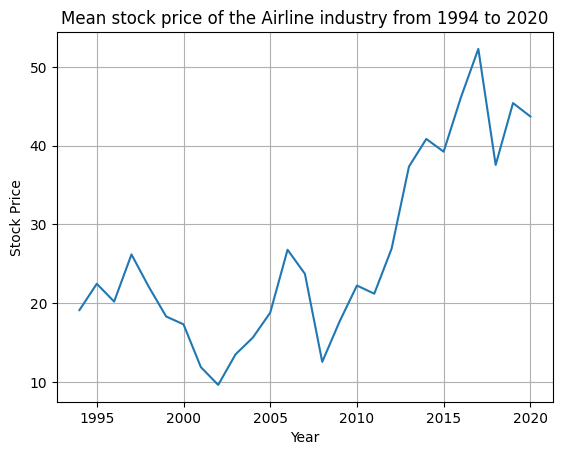

In [18]:
import matplotlib.pyplot as plt

plt.plot(mean_prcc_c_by_year)
plt.grid(True)
plt.title('Mean stock price of the Airline industry from 1994 to 2020')
plt.xlabel('Year')
plt.ylabel('Stock Price')

In [19]:
prices_2007 = df_pf_filtered.loc[df_pf_filtered['fyear'] == 2007, ['conm','prcc_c']].rename(columns={'prcc_c':'prcc_c_2007'})
prices_2008 = df_pf_filtered.loc[df_pf_filtered['fyear'] == 2008, ['conm','prcc_c']].rename(columns={'prcc_c':'prcc_c_2008'})

price_change = prices_2007.merge(prices_2008, on='conm', how='inner')
price_change['percentage_drop'] = (price_change['prcc_c_2007'] - price_change['prcc_c_2008']) / price_change['prcc_c_2007'] * 100

most_affected = price_change.sort_values('percentage_drop', ascending=False).head(1)
most_affected

,conm,prcc_c_2007,prcc_c_2008,percentage_drop
21,FRONTIER AIRLINES HOLDINGS,5.26,0.18,96.577947


In [20]:
df_pf_USA = df_pf_filtered.groupby('location').get_group('USA')
df_pf_USA

,gvkey,fyear,location,conm,ipodate,sic,prcc_c,ch,ni,asset,sale,roa
118,1045,1995,USA,AMERICAN AIRLINES GROUP INC,NaN,4512,74.250,82.000,167.000,19556.000,16910.000,0.008540
119,1045,1996,USA,AMERICAN AIRLINES GROUP INC,NaN,4512,88.125,68.000,1016.000,20497.000,17753.000,0.049568
120,1045,1997,USA,AMERICAN AIRLINES GROUP INC,NaN,4512,128.500,64.000,985.000,20915.000,18570.000,0.047095
121,1045,1998,USA,AMERICAN AIRLINES GROUP INC,NaN,4512,59.375,95.000,1314.000,22303.000,19205.000,0.058916
122,1045,1999,USA,AMERICAN AIRLINES GROUP INC,NaN,4512,67.000,85.000,985.000,24374.000,17730.000,0.040412
...,...,...,...,...,...,...,...,...,...,...,...,...
203785,187766,2015,USA,ERA GROUP INC,NaN,4522,11.150,14.370,8.705,1007.091,281.837,0.008644
203786,187766,2016,USA,ERA GROUP INC,NaN,4522,16.970,26.950,-7.978,955.173,247.228,-0.008352
203787,187766,2017,USA,ERA GROUP INC,NaN,4522,10.750,13.583,-28.161,792.097,231.321,-0.035552
203788,187766,2018,USA,ERA GROUP INC,NaN,4522,8.740,50.753,13.922,764.863,221.676,0.018202


In [21]:
mean_roa_by_year_USA = df_pf_USA.groupby('fyear')['roa'].mean()
mean_roa_by_year_USA

fyear
1994    0.110692
1995    0.013421
1996   -0.072618
1997   -0.023724
1998    0.042343
1999    0.004015
2000   -0.066566
2001   -0.210001
2002   -0.236599
2003   -0.549193
2004   -0.209837
2005   -0.251182
2006    0.038054
2007   -0.087294
2008   -0.272589
2009   -0.320700
2010   -0.205068
2011   -0.223143
2012   -0.197593
2013   -0.097706
2014   -0.471498
2015   -0.402627
2016   -0.600065
2017   -1.161059
2018    0.054186
2019    0.022067
2020   -0.071734
Name: roa, dtype: float64

Text(0, 0.5, 'ROA')

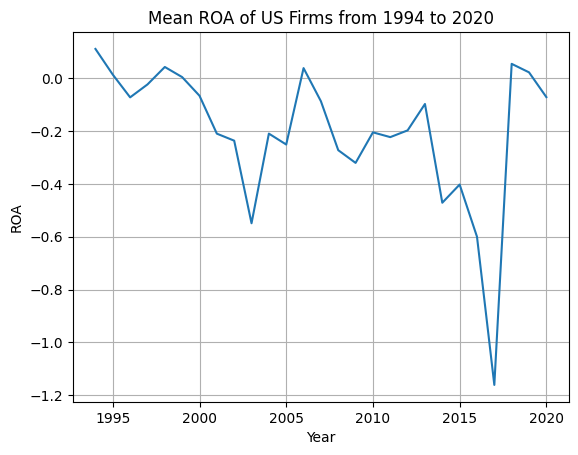

In [22]:
plt.plot(mean_roa_by_year_USA)
plt.grid(True)
plt.title('Mean ROA of US Firms from 1994 to 2020')
plt.xlabel('Year')
plt.ylabel('ROA')

PART 2C

In [23]:

import string
import nltk
from nltk.corpus import stopwords

# Download stopwords 
nltk.download('stopwords')

#  Lowercase
df["cleaned_item_1"] = df["item_1_text"].str.lower()

# Remove punctuation
df["cleaned_item_1"] = df["cleaned_item_1"].str.replace(f"[{string.punctuation}]", "", regex=True)

# Remove stopwords 
stop_words = set(stopwords.words("english"))

cleaned = []
for text in df["cleaned_item_1"]:
    words = text.split()
    filtered_words = []
    for w in words:
        if w not in stop_words:     # only keep if not a stopword
            filtered_words.append(w)
    cleaned.append(" ".join(filtered_words))

df["cleaned_item_1"] = cleaned

# Show first few rows
df[["item_1_text", "cleaned_item_1"]].head()

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/shrikarchoudhary/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,item_1_text,cleaned_item_1
0,fixed expenses are previosuly documented in an...,fixed expenses previosuly documented 8k 235000...
1,"General Hurco Companies, Inc. is an internatio...",general hurco companies inc international indu...
2,We have been engaged in the business of develo...,engaged business developing marketing products...
3,CORPORATE HISTORY Chun Can Capital Group (form...,corporate history chun capital group formerly ...
4,CORPORATE HISTORY Chun Can Capital Group (form...,corporate history chun capital group formerly ...


PART D1

In [24]:
import pandas as pd
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [25]:
# Keep only Airline firms
df_business = public_firm[public_firm["sic"].astype(str).str.startswith("45")].copy()

# Merge using inner join (only airline firms will be kept)
df_bs = pd.merge(df, df_business, on="gvkey", how="inner")

print("Number of firms in Airline sector (With 10k data):", df_bs.shape[0])

Number of firms in Airline sector (With 10k data): 415


PART D2

In [26]:
#Top Keywords (Word Counts)
def get_top_keywords_wordcount(text, n=10):
    if pd.isnull(text):
        return []
    words = text.split()
    counter = Counter(words)
    return [w for w, _ in counter.most_common(n)]

df_bs["top_keywords_wc"] = df_bs["cleaned_item_1"].apply(get_top_keywords_wordcount)

In [27]:
#Top Keywords (TF-IDF)
vectorizer = TfidfVectorizer(max_features=1000, stop_words="english")
X = vectorizer.fit_transform(df_bs["cleaned_item_1"].fillna(""))

feature_names = vectorizer.get_feature_names_out()

top_keywords_tfidf = []
for row in X:
    scores = row.toarray().flatten()
    top_idx = scores.argsort()[-10:][::-1]
    top_terms = [feature_names[i] for i in top_idx if scores[i] > 0]
    top_keywords_tfidf.append(top_terms)

df_bs["top_keywords_tfidf"] = top_keywords_tfidf

In [28]:
print(df_bs[["conm", "top_keywords_wc", "top_keywords_tfidf"]].head())

                 conm                                    top_keywords_wc  \
0  SOUTHWEST AIRLINES  [company, southwest, aircraft, flight, also, s...   
1  SOUTHWEST AIRLINES  [company, southwest, aircraft, flight, also, s...   
2  SOUTHWEST AIRLINES  [company, southwest, aircraft, flight, also, s...   
3  SOUTHWEST AIRLINES  [company, southwest, aircraft, flight, also, s...   
4  SOUTHWEST AIRLINES  [company, southwest, aircraft, flight, also, s...   

                                  top_keywords_tfidf  
0  [company, southwest, fare, aircraft, flight, a...  
1  [company, southwest, fare, aircraft, flight, a...  
2  [company, southwest, fare, aircraft, flight, a...  
3  [company, southwest, fare, aircraft, flight, a...  
4  [company, southwest, fare, aircraft, flight, a...  


PART D3

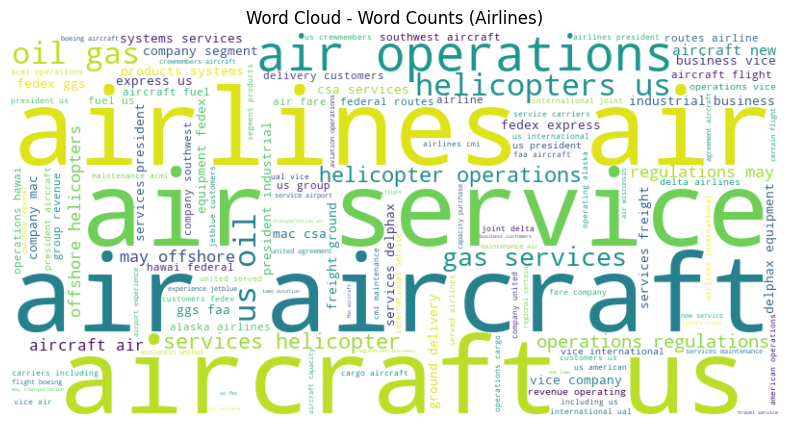

In [29]:
# Word Count-based Word Cloud
all_wc_words = " ".join([" ".join(words) for words in df_bs["top_keywords_wc"]])
wordcloud_wc = WordCloud(width=800, height=400, background_color="white").generate(all_wc_words)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud_wc, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud - Word Counts (Airlines)")
plt.show()

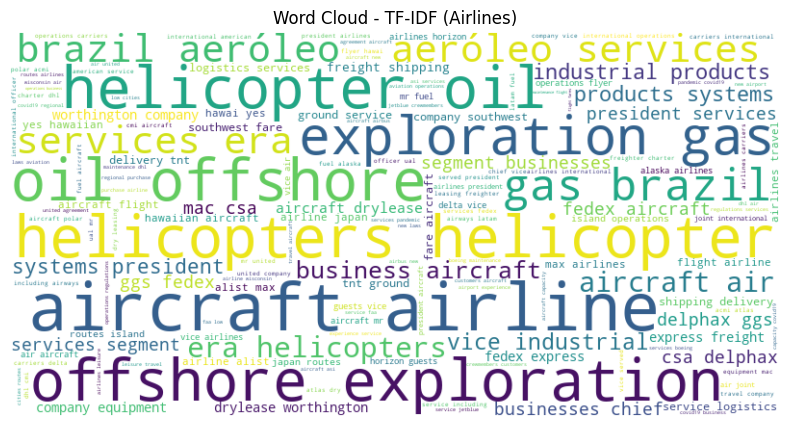

In [30]:
# TF-IDF-based Word Cloud
all_tfidf_words = " ".join([" ".join(words) for words in df_bs["top_keywords_tfidf"]])
wordcloud_tfidf = WordCloud(width=800, height=400, background_color="white").generate(all_tfidf_words)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud_tfidf, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud - TF-IDF (Airlines)")
plt.show()

PART E1

In [31]:
pip install gensim

Note: you may need to restart the kernel to use updated packages.


In [32]:
pip install numpy scipy


Note: you may need to restart the kernel to use updated packages.


In [33]:
import gensim
from gensim.models import Word2Vec

print("Gensim version:", gensim.__version__)


Gensim version: 4.3.3


In [34]:
from gensim.models import Word2Vec

#Tokenize cleaned text
sentences = [text.split() for text in df["cleaned_item_1"].dropna()]

#Train a lighter Word2Vec model, code confirmed from CHATGPT
w2v_model = Word2Vec(
    sentences=sentences,
    vector_size=50,   # smaller embedding size
    window=3,         # smaller context window
    min_count=5,      # ignore words that appear < 5 times
    workers=2,        # fewer CPU threads
    sg=0              # CBOW (faster than skip-gram)
)

print("Word2Vec training finished for Airlines.")


Word2Vec training finished for Airlines.


PART E2

In [35]:
#Keywords Word Cloud
keywords = ["airlines", "aircraft", "oil"]

for word in keywords:
    if word in w2v_model.wv:   # check only once
        print(f"\nTop 5 words similar to '{word}':")
        for sim_word, score in w2v_model.wv.most_similar(word, topn=5):
            print(f"  {sim_word} ({score:.3f})")
    else:
        print(f"'{word}' not in vocabulary")




Top 5 words similar to 'airlines':
  airline (0.749)
  railroads (0.710)
  airports (0.660)
  flights (0.654)
  reps (0.653)

Top 5 words similar to 'aircraft':
  tractors (0.755)
  trucks (0.743)
  fleet (0.739)
  truck (0.736)
  fleets (0.731)

Top 5 words similar to 'oil':
  natural (0.814)
  chromatographs (0.741)
  capacitybcfdflorida (0.722)
  wellhead (0.681)
  petroleum (0.679)


PART 3F

In [36]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

In [37]:
#Combine WC + TF-IDF keywords and build embedding
def get_combined_firm_embedding(top_keywords_wc, top_keywords_tfidf, w2v_model, vector_size=50):

    #Combine counts and TF-IDF keywords for a firm and generate a single embedding.
    
    combined_keywords = []

    if isinstance(top_keywords_wc, list):
        combined_keywords += top_keywords_wc
    if isinstance(top_keywords_tfidf, list):
        combined_keywords += top_keywords_tfidf

    embedding = np.zeros(vector_size)
    count = 0

    for word in combined_keywords:
        if word in w2v_model.wv:
            embedding += w2v_model.wv[word]
            count += 1

    # Avoid division by zero
    if count > 0:
        embedding /= count

    return embedding

In [38]:
vector_size = w2v_model.vector_size

df_bs['firm_embedding_combined'] = df_bs.apply(
    lambda row: get_combined_firm_embedding(row['top_keywords_wc'], row['top_keywords_tfidf'], w2v_model, vector_size),
    axis=1
)

In [39]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# Pick your focal firm (replace with actual name)
focal_firm_name = 'DELTA AIR LINES, INC.'

# Get the embedding of the focal firm
focal_firm_embedding = df_bs.loc[df_bs['name'] == focal_firm_name, 'firm_embedding_combined'].values[0]

# Stack all firm embeddings into a matrix
embeddings_matrix = np.vstack(df_bs['firm_embedding_combined'].values)

# Compute cosine similarity between focal firm and all firms
similarities = cosine_similarity(focal_firm_embedding.reshape(1, -1), embeddings_matrix).flatten()

# Add similarity scores to the DataFrame
df_bs['similarity_to_focal'] = similarities

# Get top 5 most similar firms (excluding the focal firm itself)
similar_firms = df_bs[df_bs['name'] != focal_firm_name].sort_values(by='similarity_to_focal', ascending=False)

print(similar_firms[['name', 'similarity_to_focal']].head(5))

                      name  similarity_to_focal
220  UNITED AIRLINES, INC.             0.827042
240  UNITED AIRLINES, INC.             0.827042
225  UNITED AIRLINES, INC.             0.827042
226  UNITED AIRLINES, INC.             0.827042
227  UNITED AIRLINES, INC.             0.827042


In [40]:
print(similar_firms[['name', 'similarity_to_focal']].drop_duplicates('name').head(5))

                                   name  similarity_to_focal
220               UNITED AIRLINES, INC.             0.827042
73               ALASKA AIR GROUP, INC.             0.814441
52                HAWAIIAN HOLDINGS INC             0.735130
175             AMERICAN AIRLINES, INC.             0.731455
269  Air Transport Services Group, Inc.             0.724834


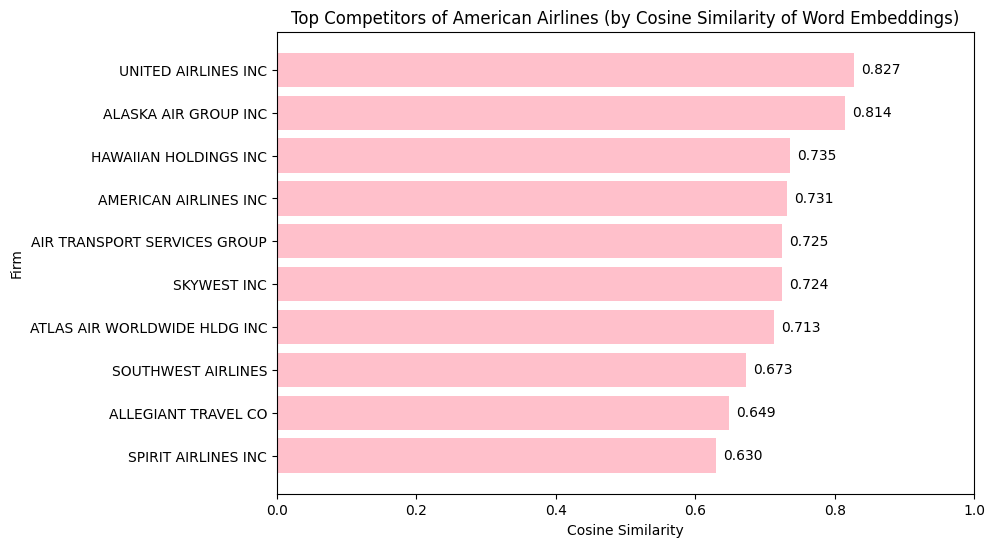

In [41]:
import matplotlib.pyplot as plt

# Select top 10 competitors
top_competitors = (
    similar_firms[['conm', 'similarity_to_focal']]
    .drop_duplicates('conm')
    .head(10)
)
plt.figure(figsize=(9,6))
bars = plt.barh(top_competitors['conm'], top_competitors['similarity_to_focal'], color='pink')
plt.gca().invert_yaxis()
plt.title("Top Competitors of American Airlines (by Cosine Similarity of Word Embeddings)")
plt.xlabel("Cosine Similarity")
plt.xlim(0, 1)   # scale 0 → 1 for consistency
plt.ylabel("Firm")


# Add similarity values on bars
for bar in bars:
    plt.text(
        bar.get_width() + 0.01,   # a little to the right of bar
        bar.get_y() + bar.get_height()/2,
        f"{bar.get_width():.3f}",
        va ='center'
    )

plt.show()


In [42]:
top_competitor_name = top_competitors.iloc[:][['conm']]

In [43]:
top_competitor_row = df_bs[df_bs["conm"].isin(top_competitor_name["conm"])]

In [44]:
focal_firm_row = df_bs[df_bs['name'] == focal_firm_name]

In [45]:
top_similar_dendrogram_row = pd.concat([top_competitor_row, focal_firm_row])

In [46]:
firm_embeddings_dendrogram_df = pd.DataFrame(
    top_similar_dendrogram_row['firm_embedding_combined'].tolist(),
    index=top_similar_dendrogram_row['gvkey']
)

print(firm_embeddings_dendrogram_df.head())

             0         1         2         3        4         5        6   \
gvkey                                                                       
9882  -1.189264  1.525469 -0.917072 -0.189855 -0.39223 -0.221193  0.48008   
9882  -1.189264  1.525469 -0.917072 -0.189855 -0.39223 -0.221193  0.48008   
9882  -1.189264  1.525469 -0.917072 -0.189855 -0.39223 -0.221193  0.48008   
9882  -1.189264  1.525469 -0.917072 -0.189855 -0.39223 -0.221193  0.48008   
9882  -1.189264  1.525469 -0.917072 -0.189855 -0.39223 -0.221193  0.48008   

             7        8         9   ...        40        41        42  \
gvkey                               ...                                 
9882   1.148592  0.65905  0.535038  ... -0.382833 -0.074352 -0.013672   
9882   1.148592  0.65905  0.535038  ... -0.382833 -0.074352 -0.013672   
9882   1.148592  0.65905  0.535038  ... -0.382833 -0.074352 -0.013672   
9882   1.148592  0.65905  0.535038  ... -0.382833 -0.074352 -0.013672   
9882   1.148592  0.659

In [47]:
firm_embeddings_dendrogram_df = firm_embeddings_dendrogram_df.drop_duplicates(keep='first')

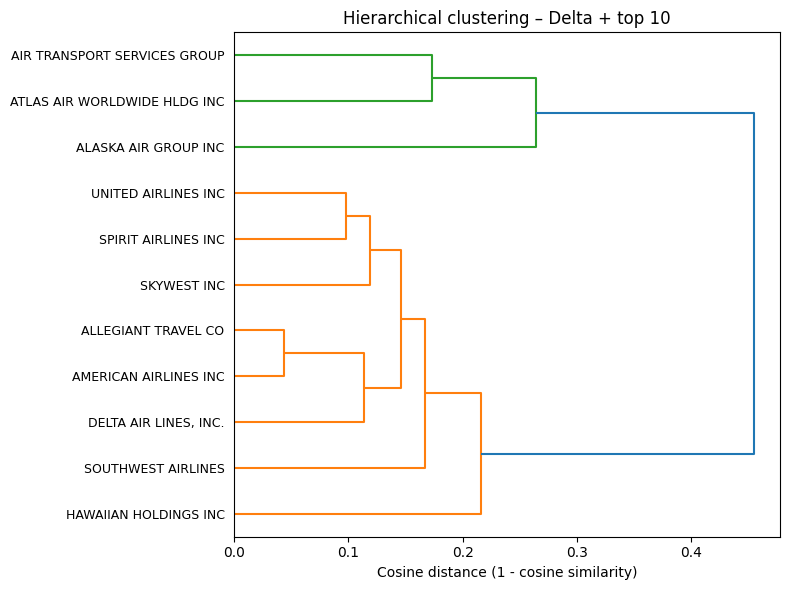

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram

# Inputs:
# - firm_embeddings: DataFrame indexed by firm name, columns are embedding dims
# - similar_firms: DataFrame with columns ['name','similarity_to_focal'] for Delta

focal = "DELTA AIR LINES, INC."
top10 = (top_competitor_row[['conm','similarity_to_focal']]
         .drop_duplicates('conm')
         .head(10)['conm']
         .tolist())
firms = [focal] + top10

X = firm_embeddings_dendrogram_df

# Hierarchical clustering on cosine distance
Z = linkage(X, method='average', metric='cosine')  # try 'complete' if tighter, chain-averse clusters are desired

plt.figure(figsize=(8, 6))
dendrogram(Z, labels=firms, orientation='right', leaf_font_size=9, #Issue is probably because firm_embeddings_similar_df has more than 20 rows.
           color_threshold=0.7 * Z[:, 2].max())
plt.title("Hierarchical clustering – Delta + top 10")
plt.xlabel("Cosine distance (1 - cosine similarity)")
plt.tight_layout()
plt.show()


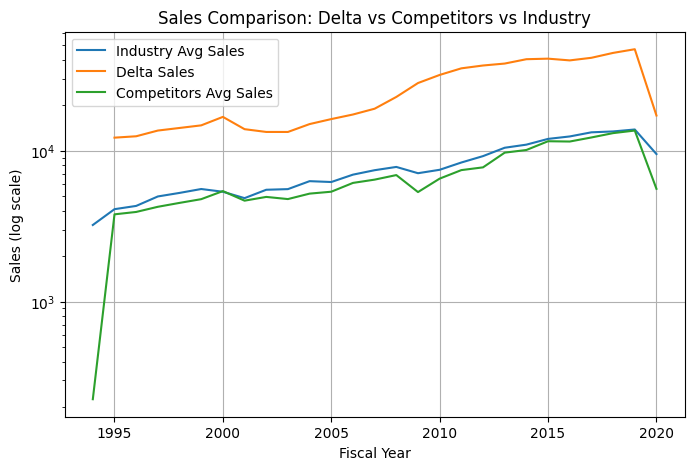

In [49]:
#Sales comparison
mean_sales_focal_firm = focal_firm_row.groupby('fyear')['sale'].mean()
mean_sales_by_year = df_bs.groupby('fyear')['sale'].mean()
mean_sales_top_similar = top_competitor_row.groupby('fyear')['sale'].mean()

plt.figure(figsize=(8,5))
plt.plot(mean_sales_by_year, label="Industry Avg Sales")
plt.plot(mean_sales_focal_firm, label="Delta Sales")
plt.plot(mean_sales_top_similar, label="Competitors Avg Sales")
plt.yscale('log')  # log scale for readability
plt.grid(True)
plt.title("Sales Comparison: Delta vs Competitors vs Industry")
plt.xlabel("Fiscal Year")
plt.ylabel("Sales (log scale)")
plt.legend(loc="upper left")
plt.show()

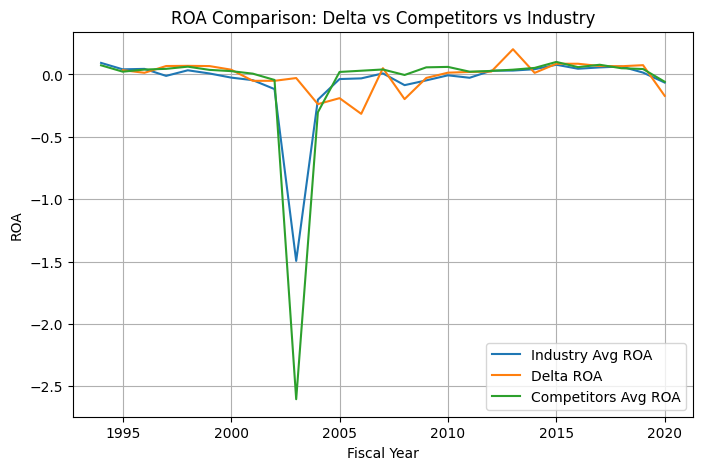

In [50]:
#ROA comparison
mean_roa_focal_firm = focal_firm_row.groupby('fyear')['roa'].mean()
mean_roa_by_year = df_bs.groupby('fyear')['roa'].mean()
mean_roa_top_similar = top_competitor_row.groupby('fyear')['roa'].mean()

plt.figure(figsize=(8,5))
plt.plot(mean_roa_by_year, label="Industry Avg ROA")
plt.plot(mean_roa_focal_firm, label="Delta ROA")
plt.plot(mean_roa_top_similar, label="Competitors Avg ROA")
plt.grid(True)
plt.title("ROA Comparison: Delta vs Competitors vs Industry")
plt.xlabel("Fiscal Year")
plt.ylabel("ROA")
plt.legend(loc="lower right")
plt.show()